<a href="https://colab.research.google.com/github/Nibi2003/Transfomer_keypoint/blob/main/Codigos/Pose_format.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Código para gerar aumento de dados de Keypoints usando pose format

> pose-format-0.5.0

In [ ]:
 !pip install --upgrade tensorflow
!pip install --upgrade keras

In [ ]:
from google.colab import drive

# Monta o Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/Nibi2003/Transfomer_keypoint.git

fatal: destination path 'Transfomer_keypoint' already exists and is not an empty directory.


In [ ]:
!pip install pose-format

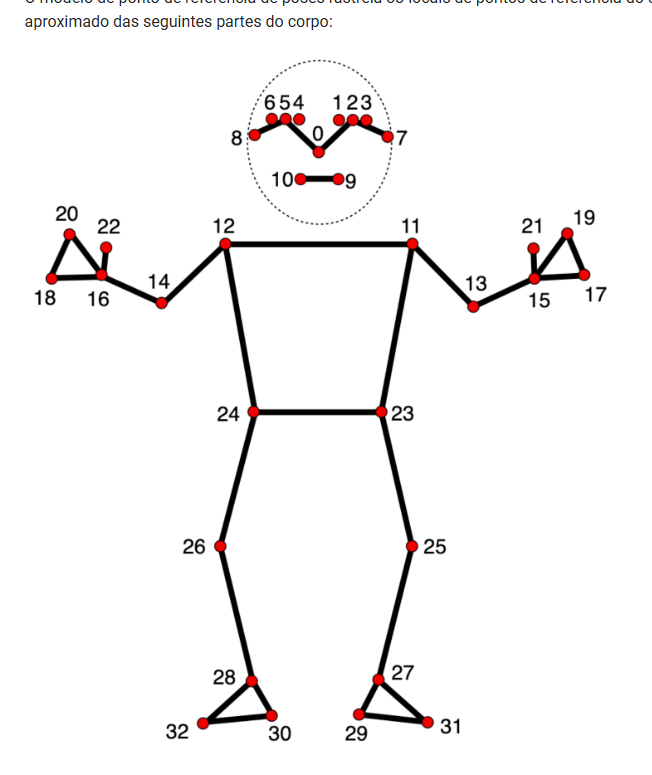

In [ ]:
'''
0 - nose
1 - left eye (inner)
2 - left eye
3 - left eye (outer)
4 - right eye (inner)
5 - right eye
6 - right eye (outer)
7 - left ear
8 - right ear
9 - mouth (left)
10 - mouth (right)
11 - left shoulder
12 - right shoulder
13 - left elbow
14 - right elbow
15 - left wrist
16 - right wrist
17 - left pinky
18 - right pinky
19 - left index
20 - right index
21 - left thumb
22 - right thumb
23 - left hip
24 - right hip
25 - left knee
26 - right knee
27 - left ankle
28 - right ankle
29 - left heel
30 - right heel
31 - left foot index
32 - right foot index
'''

'\n0 - nose\n1 - left eye (inner)\n2 - left eye\n3 - left eye (outer)\n4 - right eye (inner)\n5 - right eye\n6 - right eye (outer)\n7 - left ear\n8 - right ear\n9 - mouth (left)\n10 - mouth (right)\n11 - left shoulder\n12 - right shoulder\n13 - left elbow\n14 - right elbow\n15 - left wrist\n16 - right wrist\n17 - left pinky\n18 - right pinky\n19 - left index\n20 - right index\n21 - left thumb\n22 - right thumb\n23 - left hip\n24 - right hip\n25 - left knee\n26 - right knee\n27 - left ankle\n28 - right ankle\n29 - left heel\n30 - right heel\n31 - left foot index\n32 - right foot index\n'

In [ ]:
import os
import glob
import numpy as np

data_dir = '/content/Transfomer_keypoint/MediaPipe/treino'

keypoints_list = []
labels_list = []

def process_keypoints(base_path, keypoints_list, labels_list):
    for class_folder in os.listdir(base_path):
        class_path = os.path.join(base_path, class_folder)

        for file_path in glob.glob(os.path.join(class_path, '*.npy')):
            keypoints = np.load(file_path, allow_pickle=True)
            keypoints_list.append(file_path)
            labels_list.append(int(class_folder))

process_keypoints(data_dir, keypoints_list, labels_list)


print("Número de arquivos de keypoints:", len(keypoints_list))
print("Número de rótulos:", len(labels_list))

index = 0
keypoints_file_path = keypoints_list[index]
keypoints = np.load(keypoints_file_path, allow_pickle=True)
label = labels_list[index]

print("Caminho do arquivo de keypoints:", keypoints_list)
print("Rótulo correspondente:", labels_list)


Número de arquivos de keypoints: 22
Número de rótulos: 22
Caminho do arquivo de keypoints: ['/content/Transfomer_keypoint/MediaPipe/treino/0/bebe05-2_keypoints.npy', '/content/Transfomer_keypoint/MediaPipe/treino/0/bebe02-4_keypoints.npy', '/content/Transfomer_keypoint/MediaPipe/treino/0/bebe02-2_keypoints.npy', '/content/Transfomer_keypoint/MediaPipe/treino/0/bebe05-1_keypoints.npy', '/content/Transfomer_keypoint/MediaPipe/treino/0/bebe02-1_keypoints.npy', '/content/Transfomer_keypoint/MediaPipe/treino/0/bebe02-3_keypoints.npy', '/content/Transfomer_keypoint/MediaPipe/treino/1/bebe16-5_keypoints.npy', '/content/Transfomer_keypoint/MediaPipe/treino/1/bebe14-1_keypoints.npy', '/content/Transfomer_keypoint/MediaPipe/treino/1/bebe18_keypoints.npy', '/content/Transfomer_keypoint/MediaPipe/treino/1/bebe21_keypoints.npy', '/content/Transfomer_keypoint/MediaPipe/treino/1/bebe03_keypoints.npy', '/content/Transfomer_keypoint/MediaPipe/treino/1/bebe22_keypoints.npy', '/content/Transfomer_keypoin

> Recebe keypoints no formato (frames, keypoints, dims)

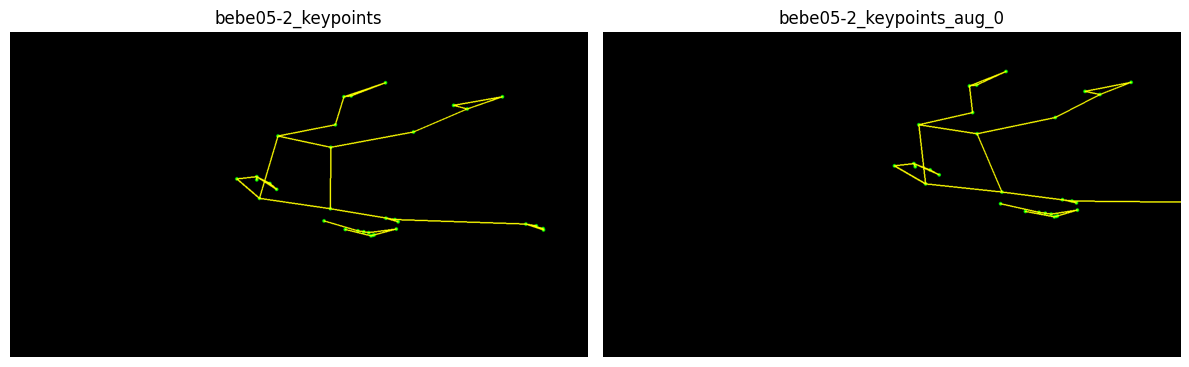

(900, 33, 2)
(900, 33, 2)
(900, 33, 2)


In [ ]:
from pose_format.numpy import NumPyPoseBody
from pose_format.pose import Pose
from pose_format.pose_header import PoseHeader, PoseHeaderDimensions
from pose_format.pose_header import PoseHeaderComponent
from pose_format.pose_body import PoseBody
import numpy.ma as ma
from typing import BinaryIO, List, Union
import random
import cv2
import matplotlib.pyplot as plt

class MediaPipeKeypointsVisualizer:
    def __init__(self):
        """
        Inicializa o visualizador de keypoints do MediaPipe.
        """
        self.pose_format = PoseBody(fps=30, data=[], confidence=[])

    def draw_keypoints(self, keypoints, limbs=None):
        """
        Desenha keypoints e conexões (limbs) em um fundo preto.

        Params:
        keypoints: np.array
            Array de keypoints a serem desenhados.
        limbs: list of tuples, optional
            Lista de conexões entre os keypoints. Cada conexão é representada por uma tupla de dois índices.

        Returns:
        np.array
            Imagem com keypoints e conexões desenhadas.
        """
        background = np.zeros((720, 1280, 3), dtype=np.uint8)

        # Desenha os keypoints no fundo preto
        for kp in keypoints:
            x, y = int(kp[0] * 1280), int(kp[1] * 720)  # Escala para o tamanho da imagem
            cv2.circle(background, (x, y), 4, (0, 255, 0), -1)  # Desenha um círculo verde para cada ponto

        # Desenha as conexões entre os keypoints
        if limbs:
            for limb in limbs:
                start, end = limb
                if start < len(keypoints) and end < len(keypoints):
                    start_point = (int(keypoints[start][0] * 1280), int(keypoints[start][1] * 720))
                    end_point = (int(keypoints[end][0] * 1280), int(keypoints[end][1] * 720))
                    cv2.line(background, start_point, end_point, (0, 255, 255), 2)  # Desenha uma linha amarela para cada conexão

        return background


class object_kp():
    def __init__(self, kp_path, label, aug_num=None, limbs=None, type_aug=None):
        """
        Cria um objeto para processamento de keypoints. Recebe um vídeo e pode gerar keypoints aumentados deste vídeo.

        Params:
        kp_path: str
            Caminho para o arquivo .npy contendo os keypoints.
        label: str
            Rótulo associado ao vídeo.
        aug_num: int, optional
            Número de augumentações a serem geradas (default é 1).
        limbs: list of tuples, optional
            Lista de conexões entre os keypoints (default é uma lista padrão de conexões).
        type_aug: int, optional
            Tipo de aumento a ser aplicado (default é 0, que significa rotation_std=0.2, shear_std=0.2, scale_std=0.2).
        """
        self.kp_path = kp_path
        self.label = label
        self.aug_num = aug_num if aug_num is not None else 1
        self.limbs = limbs if limbs is not None else [
            (0, 1), (1, 2), (2, 3), (3, 7), (0, 4), (4, 5), (5, 6), (6, 8),
            (9, 10), (11, 12), (11, 13), (13, 15), (15, 17), (15, 19), (15, 21),
            (17, 19), (12, 14), (14, 16), (16, 18), (16, 20), (16, 22), (18, 20),
            (11, 23), (12, 24), (23, 24), (23, 25), (25, 27), (27, 29), (27, 31),
            (29, 31), (24, 26), (26, 28), (28, 30), (28, 32), (30, 32)
        ]

        self.keypoints = np.load(self.kp_path, allow_pickle=True)
        self.pose = self.create_pose(self.keypoints, self.limbs)
        self.type_aug = type_aug if type_aug is not None else 0  # significa rotation_std=0.2, shear_std=0.2, scale_std=0.2
        self.video_name = os.path.splitext(os.path.basename(kp_path))[0]
        self.aumented_poses = []
        self.aumented_nomes = []
        self._augment()

    def create_pose(self, keypoints, limbs=None, video_width=1920, video_height=1080, colors=None):
        """
        Cria um objeto Pose a partir dos keypoints fornecidos.

        Params:
        keypoints: np.array
            Array de keypoints.
        limbs: list of tuples, optional
            Lista de conexões entre os keypoints (default é self.limbs).
        video_width: int, optional
            Largura do vídeo (default é 1920).
        video_height: int, optional
            Altura do vídeo (default é 1080).
        colors: list of tuples, optional
            Lista de cores para cada conexão (default é uma lista de cores vermelhas).

        Returns:
        Pose
            Objeto Pose criado.
        """
        if limbs is None:
            limbs = self.limbs

        if colors is None:
            colors = [(255, 0, 0) for _ in limbs]

        keypoint_names = ['Point {}'.format(i) for i in range(len(keypoints[0]))]

        pose_header_component = PoseHeaderComponent(
            name="FullBody",
            points=keypoint_names,
            limbs=limbs,
            colors=colors,
            point_format="XY"  # Formato dos pontos
        )

        dimensions = PoseHeaderDimensions(width=video_width, height=video_height, depth=1)

        pose_header = PoseHeader(
            version=0.1,
            dimensions=dimensions,
            components=[pose_header_component]
        )

        keypoints = keypoints[:, np.newaxis, :, :]  # Forma: (Frames, People, Points, Dims)
        confidence = np.ones(keypoints.shape[:-1], dtype=np.float32)  # Forma: (Frames, People, Points)

        # Criar o PoseBody
        pose_body = NumPyPoseBody(data=ma.array(keypoints), confidence=confidence, fps=30.0)

        pose = Pose(header=pose_header, body=pose_body)

        return pose

    def _augment(self):
        """
        Gera poses aumentadas e armazena na lista self.aumented_poses.
        """
        list_aumented = []
        list_nomes = []
        if self.type_aug == 0:
            for i in range(self.aug_num):
                pose_aumentada = self.pose.body.augment2d()
                list_aumented.append(pose_aumentada)
                list_nomes.append(f"{self.video_name}_aug_{i}")

        self.aumented_poses = list_aumented
        self.aumented_nomes = list_nomes

    def visualize_diferences(self, index_pose, index_frame):
        """
        Mostra a diferença entre a pose original e a pose aumentada.

        Params:
        index_pose: int
            Índice da pose na lista de poses aumentadas.
        index_frame: int
            Índice do frame na pose aumentada.

        Returns:
        None
            Retorna o plot das duas imagens na mesma janela.
        """
        # Cria uma instância de MediaPipeKeypointsVisualizer
        model = MediaPipeKeypointsVisualizer()

        # Obtém keypoints da pose original e da pose aumentada selecionada
        original_keypoints = self.pose.body.data[index_frame][0]  # Assume apenas 1 pessoa e 1 frame
        augmented_keypoints = self.aumented_poses[index_pose].data[index_frame][0]  # Assume apenas 1 pessoa e 1 frame

        nome_pose = self.aumented_nomes[index_pose]
        # Cria imagens com keypoints desenhados
        original_image = model.draw_keypoints(original_keypoints, limbs=self.limbs)
        augmented_image = model.draw_keypoints(augmented_keypoints, limbs=self.limbs)

        # Mostra as imagens lado a lado
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.title(self.video_name)
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))
        plt.title(nome_pose)
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    def create_video(self, out_path, pose, nome_pose, fps=30, video_width=1920, video_height=1080):
        """
        Cria um vídeo mostrando as poses aumentadas com fundo preto.

        Params:
        out_path: str
            Caminho onde o vídeo será salvo.
        pose: Pose
            Objeto Pose a ser visualizado.
        nome_pose: str
            Nome da pose para o título.
        fps: int, optional
            Frames por segundo do vídeo (default é 30).
        video_width: int, optional
            Largura do vídeo em pixels (default é 1920).
        video_height: int, optional
            Altura do vídeo em pixels (default é 1080).
        """
        pass

    def save_npy(self, out_path):
        """
        Salva os keypoints aumentados em formato .npy e shape = (frames, points, dims).

        Params:
        out_path: str
            Caminho onde os keypoints serão salvos.

        Returns:
        None
            Salva os keypoints no diretório desejado.
        """
        lista_objetos_pose = self.aumented_poses
        lista_nomes_objetos = self.aumented_nomes

        for pose, nome in zip(lista_objetos_pose, lista_nomes_objetos):
            keypoints_list = []
            for frame_idx in range(pose.data.shape[0]):
                keypoints = pose.data[frame_idx][0]
                keypoints_list.append(keypoints)

            print(np.array(keypoints_list).shape)
            np.save(f"{out_path}/{nome}.npy", np.array(keypoints_list))


objeto_kp1 = object_kp(keypoints_list[0], labels_list[0], type_aug=0, aug_num=3)
objeto_kp1.visualize_diferences(0, 0)
objeto_kp1.save_npy('/content/Salvar_keypoints')


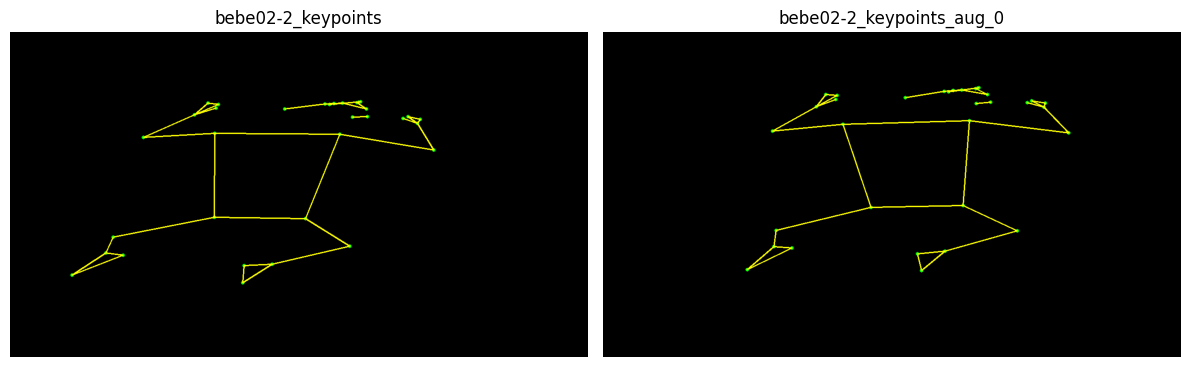

In [ ]:
teste2 = '/content/Transfomer_keypoint/MediaPipe/treino/0/bebe02-2_keypoints.npy'
label = 0
objeto_kp2 = object_kp(teste2, label, type_aug=0, aug_num=3)
objeto_kp2.visualize_diferences(0, 0)

In [ ]:
print("Caminho do arquivo de keypoints:", keypoints_list)
print("Rótulo correspondente:", labels_list)
for path_kp,label in zip(keypoints_list, labels_list):
  if label == 0:
    save_path = '/content/drive/MyDrive/GMA/Base atual/Kp_aumentados/0'
    objeto_kp = object_kp(path_kp, label, type_aug=0, aug_num=3)
    objeto_kp.save_npy(save_path)
  if label == 1:
    save_path = '/content/drive/MyDrive/GMA/Base atual/Kp_aumentados/1'
    objeto_kp = object_kp(path_kp, label, type_aug=0, aug_num=3)
    objeto_kp.save_npy(save_path)


Caminho do arquivo de keypoints: ['/content/Transfomer_keypoint/MediaPipe/treino/0/bebe05-2_keypoints.npy', '/content/Transfomer_keypoint/MediaPipe/treino/0/bebe02-4_keypoints.npy', '/content/Transfomer_keypoint/MediaPipe/treino/0/bebe02-2_keypoints.npy', '/content/Transfomer_keypoint/MediaPipe/treino/0/bebe05-1_keypoints.npy', '/content/Transfomer_keypoint/MediaPipe/treino/0/bebe02-1_keypoints.npy', '/content/Transfomer_keypoint/MediaPipe/treino/0/bebe02-3_keypoints.npy', '/content/Transfomer_keypoint/MediaPipe/treino/1/bebe16-5_keypoints.npy', '/content/Transfomer_keypoint/MediaPipe/treino/1/bebe14-1_keypoints.npy', '/content/Transfomer_keypoint/MediaPipe/treino/1/bebe18_keypoints.npy', '/content/Transfomer_keypoint/MediaPipe/treino/1/bebe21_keypoints.npy', '/content/Transfomer_keypoint/MediaPipe/treino/1/bebe03_keypoints.npy', '/content/Transfomer_keypoint/MediaPipe/treino/1/bebe22_keypoints.npy', '/content/Transfomer_keypoint/MediaPipe/treino/1/bebe16-3_keypoints.npy', '/content/Tr

In [ ]:
teste_path= '/content/drive/MyDrive/GMA/Videos bebês keypoints/Atípico/privacy_bebe03.mp4'